In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine


In [2]:
wine = load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print (wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
features = pd.DataFrame(wine.data, columns = wine.feature_names)
target = pd.DataFrame(wine.target, columns = ['target'])

In [6]:
df = pd.concat([features,target], axis = 1)

In [7]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [8]:
correlation = df.corr('pearson')

In [9]:
abs(correlation['target']).sort_values()

ash                             0.049643
magnesium                       0.209179
color_intensity                 0.265668
alcohol                         0.328222
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
alcalinity_of_ash               0.517859
hue                             0.617369
proline                         0.633717
total_phenols                   0.719163
od280/od315_of_diluted_wines    0.788230
flavanoids                      0.847498
target                          1.000000
Name: target, dtype: float64

In [10]:
x = df['flavanoids']
y = df['target']  ##Data Preprocesing

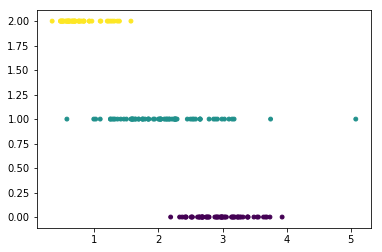

In [11]:
#plt.plot(x,y,'r.')  #data visualisation
plt.scatter(x,y,c=y.ravel(), s=15)
#plt.scatter(0.25, 0.2, c='r', marker='x', s=100)

In [12]:
x = np.array(x)
y = np.array(y)

In [17]:
x = (x - x.min())/(x.max() - x.min())
xtrain, xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3)

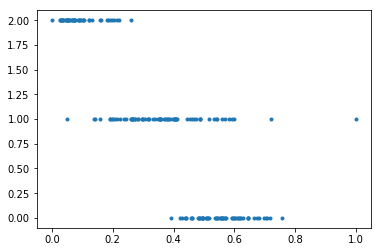

In [18]:
plt.plot(x,y,'.')

In [61]:
ztrain = ytrain
ztest = ytest
for i in range(len(ytrain)):
    if ytrain[i]==2:
        ytrain[i]=1
for i in range(len(ytest)):
    
    if ytest[i]==2:
        ytest[i]=1
        


        
 
            
        

In [62]:
def hypothesis(a,x,b):
    return(1/(1 + np.exp(-(a*x+b))))

In [63]:
def error(a,x,b,y):
    e = 0
    m = len(x)
    for i in range(m):
        e += -(y[i]*np.log(hypothesis(a,x[i],b))) - ((1 - y[i])*np.log(1-hypothesis(a,x[i],b)))
    return (1/m)*e

In [64]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (hypothesis(a,x[i],b) - y[i])*x[i]
        grad_b+= (hypothesis(a,x[i],b) - y[i])
        
        
    a = a- (grad_a * learning_rate)
    b = b-(grad_b * learning_rate)
    
    return a,b

In [65]:
def descend(int_a,x,init_b,y,learning_rate,iterations):
    a = init_a
    b = init_b
    
    
    for i in range(iterations):
        e = error(a,x,b,y)
        if i%1000==0:
            print(f"error{e},a:{a},b:{b}")
                  
        a,b = step_gradient(a,x,b,y,learning_rate)
                  
    return a,b

In [87]:
init_a = -11.43865716089552
init_b = 5.485318043816511
iterations = 10000
learning_rate = 0.1

In [88]:
final_a,final_b = descend(init_a,xtrain,init_b,ytrain,learning_rate,iterations)

error0.37379353716201497,a:-11.43865716089552,b:5.485318043816511
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724
error0.3737935371620146,a:-11.438657160895975,b:5.485318043816724


In [89]:
error(final_a,xtrain,final_b,ytrain)

0.3737935371620146

In [90]:
error(final_a,xtest,final_b,ytest)

0.2497171125107355

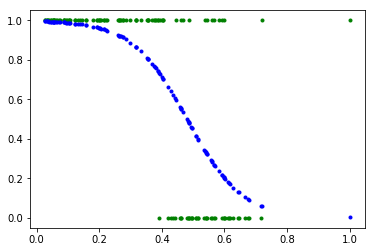

In [91]:
plt.plot(xtrain,ytrain,'g.',
        xtrain, hypothesis(final_a,xtrain,final_b),'b.')

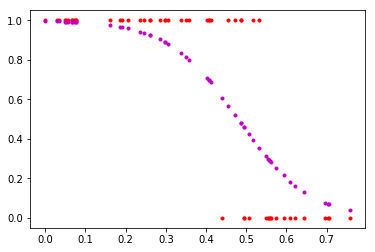

In [92]:
plt.plot(xtest,ytest,"r.",
        xtest,hypothesis(final_a,xtest,final_b),'m.')

In [93]:
def accuracy(a,x,b,y):
    correct = 0
    m = len(x)
    
    for i in range(m):
        pred = hypothesis(a,x[i],b)
        
        if pred >0.5:
            z=1
        else:
            z=0
            
        if y[i] == z:
            correct += 1
            
    print(f"Accuracy: {correct/len(y)}")

In [94]:
accuracy(final_a,xtrain,final_b,ytrain)

Accuracy: 0.8467741935483871


In [95]:
accuracy(final_a, xtest,final_b,ytest)

Accuracy: 0.9074074074074074
